In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as plt
from tensorflow.keras import datasets,layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from keras.metrics import categorical_crossentropy
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

(60000, 28, 28)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

c:\Users\omar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


c:\Users\omar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 28ms/step - accuracy: 0.7441 - loss: 0.7009 - val_accuracy: 0.8718 - val_loss: 0.3682
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8780 - loss: 0.3377 - val_accuracy: 0.8886 - val_loss: 0.3137
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8941 - loss: 0.2850 - val_accuracy: 0.8951 - val_loss: 0.2929
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9073 - loss: 0.2515 - val_accuracy: 0.8988 - val_loss: 0.2783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9163 - loss: 0.2267 - val_accuracy: 0.9038 - val_loss: 0.2712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9251 - loss: 0.2031 - val_accuracy: 0.9044 - val_loss: 0.2643
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9291 - loss: 0.1872 - val_accuracy: 0.9079 - val_loss: 0.2704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9359 - loss: 0.16

In [18]:
# #Evaluate the model
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

confusion matrix

In [7]:
mnist_predictions = model.predict(x_test)
mnist_predicted_labels = np.argmax(mnist_predictions, axis=1)
mnist_confusion = confusion_matrix(y_test, mnist_predicted_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


Text(70.72222222222221, 0.5, 'True classes')

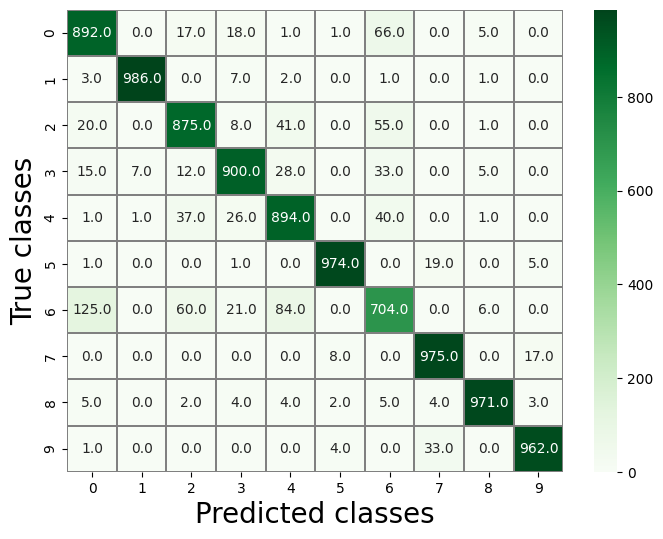

In [8]:
import seaborn as sns 

plt.figure(figsize = (8,6))
sns.heatmap(mnist_confusion, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

precision:
True Positive / (True Positive + False Positive)

In [9]:
Precision = metrics.precision_score(y_test, mnist_predicted_labels, average='weighted')
print(Precision,"of data that is predicted as true was exactly true")

0.913012884289988 of data that is predicted as true was exactly true


Recall: True Positive / (True Positive + False Negative)

In [10]:
recall = metrics.recall_score(y_test, mnist_predicted_labels, average="weighted")
print(recall, "of the actual true data was predicted as true")

0.9133 of the actual true data was predicted as true


F1 score: 2 * ((Precision * recall) / (Precision + recall))

In [11]:
F1_score = metrics.f1_score(y_test, mnist_predicted_labels, average="weighted")
F1_score

0.9127887924800748